In [1]:
# look at air quality and cardiac/respiratory disease for all countries over time

# load libraries

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust plot configuration

In [2]:
# import csv data generated in SQL. Original data from https://ourworldindata.org/
df = pd.read_csv(r"C:\Users\benja\airpollutionproject2.csv")
df

,Country,Year,Population,PM25,NOxperPerson,SO2perPerson,COperPerson,OCperPerson,NMVOCperPerson,BCperPerson,NH3perPerson,DeathCardiovascper100k,DeathChronicRespper100k
0,Afghanistan,1990,10694804,65.486794,34.558199,0.987409,71.628419,1.977495,30.368960,0.610056,7.080270,419.820690,55.587741
1,Afghanistan,1995,16418911,65.179512,13.424437,0.335274,29.572081,1.524025,10.813568,0.436065,6.435403,305.489201,41.555740
2,Afghanistan,2000,19542986,64.922462,6.464570,0.210530,16.228803,1.630228,5.184607,0.457069,6.064357,275.899497,38.228549
3,Afghanistan,2005,24411196,64.522682,4.608328,0.248745,13.912318,1.444959,4.513982,0.403129,5.300599,222.012883,30.277091
4,Afghanistan,2010,28189672,65.245590,13.306341,0.736470,31.883472,1.363757,8.717012,0.420699,5.193251,191.325390,24.721820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,Zimbabwe,2013,13555420,23.111088,6.439832,5.053593,114.699741,7.685979,21.333417,2.226384,8.794760,118.756925,19.866592
2300,Zimbabwe,2014,13855758,22.805950,6.065659,4.998716,112.788209,7.661716,20.997518,2.205167,8.004707,118.044787,19.594742
2301,Zimbabwe,2015,14154937,21.733709,5.923170,4.749671,113.786196,7.649309,21.173776,2.183849,7.942518,117.619739,19.434915
2302,Zimbabwe,2016,14452705,21.726948,5.274752,4.113603,112.955679,7.747735,20.945443,2.184403,7.994350,117.189135,19.290507


In [3]:
# check data type
df.dtypes

Country                     object
Year                         int64
Population                   int64
PM25                       float64
NOxperPerson               float64
SO2perPerson               float64
COperPerson                float64
OCperPerson                float64
NMVOCperPerson             float64
BCperPerson                float64
NH3perPerson               float64
DeathCardiovascper100k     float64
DeathChronicRespper100k    float64
dtype: object

In [4]:
# check to see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
# remove rows with missing data
#df2 = df.dropna()
#df2
# no missing data

Country - 0.0%
Year - 0.0%
Population - 0.0%
PM25 - 0.0%
NOxperPerson - 0.0%
SO2perPerson - 0.0%
COperPerson - 0.0%
OCperPerson - 0.0%
NMVOCperPerson - 0.0%
BCperPerson - 0.0%
NH3perPerson - 0.0%
DeathCardiovascper100k - 0.0%
DeathChronicRespper100k - 0.0%


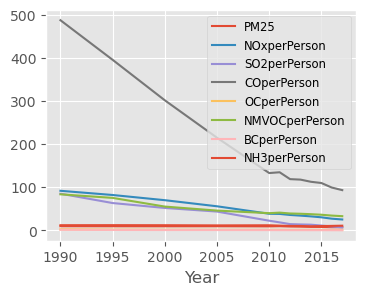

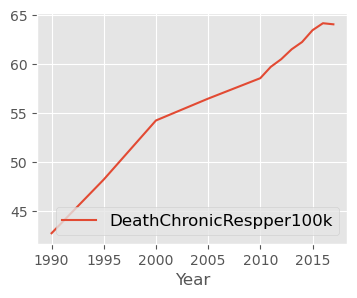

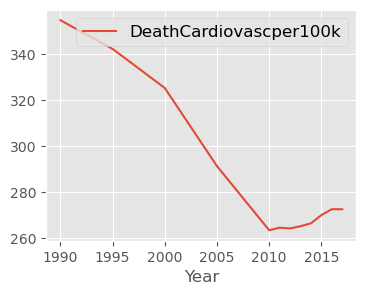

In [5]:
# pull out noe country, USA, to look at data and see if there are any visual patterns between pollution 
# and cardiac/respiratory disease

# get subset of data for USA
USA = df[df["Country"] == "United States"]

# look at data as a plot
# but won't plot population

USA.plot(x="Year", y=USA.columns[[3, 4, 5, 6, 7, 8, 9, 10]], figsize=(4, 3))
plt.legend(fontsize="small")
plt.xlabel("Year");
USA.plot(x="Year", y="DeathChronicRespper100k", figsize=(4, 3))
plt.legend(fontsize="large")
plt.xlabel("Year");
USA.plot(x="Year", y="DeathCardiovascper100k", figsize=(4, 3))
plt.legend(fontsize="large")
plt.xlabel("Year");


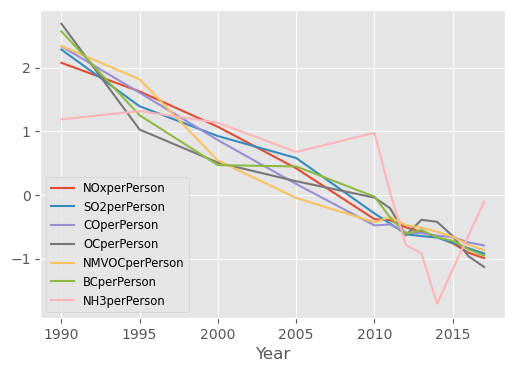

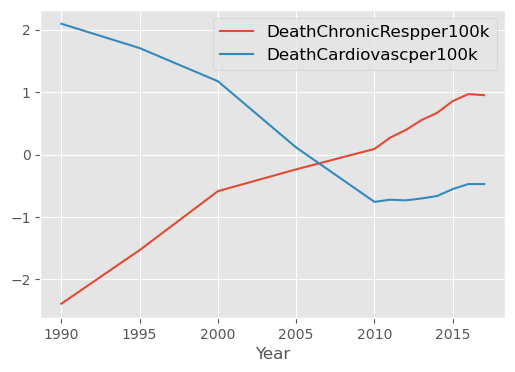

In [7]:
# the scale varies quite a bit for each parameter, so normalize data
# set columns to normalize
col_norm = ['PM25', 'NOxperPerson', 'SO2perPerson', 'COperPerson', 'OCperPerson', 'NMVOCperPerson', 'BCperPerson', 'NH3perPerson', 'DeathCardiovascper100k', 'DeathChronicRespper100k']

# normalize data

USA2 = StandardScaler().fit_transform(USA[col_norm])

# now turn the array into a dataframe

USA2 = pd.DataFrame(USA2)

# set column names
USA2.columns = ['PM25', 'NOxperPerson', 'SO2perPerson', 'COperPerson', 'OCperPerson', 'NMVOCperPerson', 'BCperPerson', 'NH3perPerson', 'DeathCardiovascper100k', 'DeathChronicRespper100k']

# put year back in...
y=USA.iloc[:,1].values # get the values of year from the original dataset

USA2['Year'] = y # set year column to the year values...

# plot the normalized data, separating polluiton and deaths to have better visualization of each
USA2.plot(x="Year", y=USA2.columns[[1, 2, 3, 4, 5, 6, 7]], figsize=(6, 4)) # pollution
plt.legend(fontsize="small")
plt.xlabel("Year");
USA2.plot(x="Year", y=["DeathChronicRespper100k", "DeathCardiovascper100k"], figsize=(6, 4)) # deaths
plt.legend(fontsize="large")
plt.xlabel("Year");

# appears to be a solid decreasing trend for all pollutants and cardiovascular death burden over time, but an increasing trend in chronic respiratory deaths

In [8]:
#cross correlation assumes stationarity, no change in mean or variance over time.  test for stationarity with augmented dickey fuller test
# set up layout for  results with "results = below"  set up a list of variables from the test to print out

 
USAadf = USA.drop(['Country', 'Year'], axis = 1)
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC') 
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations']) 
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result

In [9]:
# now run the ADF test on the data, USA in this case (but don't look at country or year)
adf_table = USA.drop(['Country', 'Year'], axis = 1) # drop out country and year
adf_table.apply(adf_test, axis = 0)

,Population,PM25,NOxperPerson,SO2perPerson,COperPerson,OCperPerson,NMVOCperPerson,BCperPerson,NH3perPerson,DeathCardiovascper100k,DeathChronicRespper100k
Test Statistic,0.277131,1.263062,-2.928441,-1.342724e+01,-3.570472,-5.853196e+00,-8.751503e+00,0.707095,-2.043201,-2.197256,-1.484471e+01
P-value,0.976271,0.996394,0.042139,4.079130e-25,0.006351,3.549535e-07,2.828432e-14,0.989978,0.267958,0.207243,1.814731e-27
Lags Used,4.000000,1.000000,1.000000,4.000000e+00,2.000000,0.000000e+00,1.000000e+00,4.000000,4.000000,4.000000,4.000000e+00
No of Observations,7.000000,10.000000,10.000000,7.000000e+00,9.000000,1.100000e+01,1.000000e+01,7.000000,7.000000,7.000000,7.000000e+00
Critical Value (1%),-4.938690,-4.331573,-4.331573,-4.938690e+00,-4.473135,-4.223238e+00,-4.331573e+00,-4.938690,-4.938690,-4.938690,-4.938690e+00
Critical Value (5%),-3.477583,-3.232950,-3.232950,-3.477583e+00,-3.289881,-3.189369e+00,-3.232950e+00,-3.477583,-3.477583,-3.477583,-3.477583e+00
Critical Value (10%),-2.843868,-2.748700,-2.748700,-2.843868e+00,-2.772382,-2.729839e+00,-2.748700e+00,-2.843868,-2.843868,-2.843868,-2.843868e+00


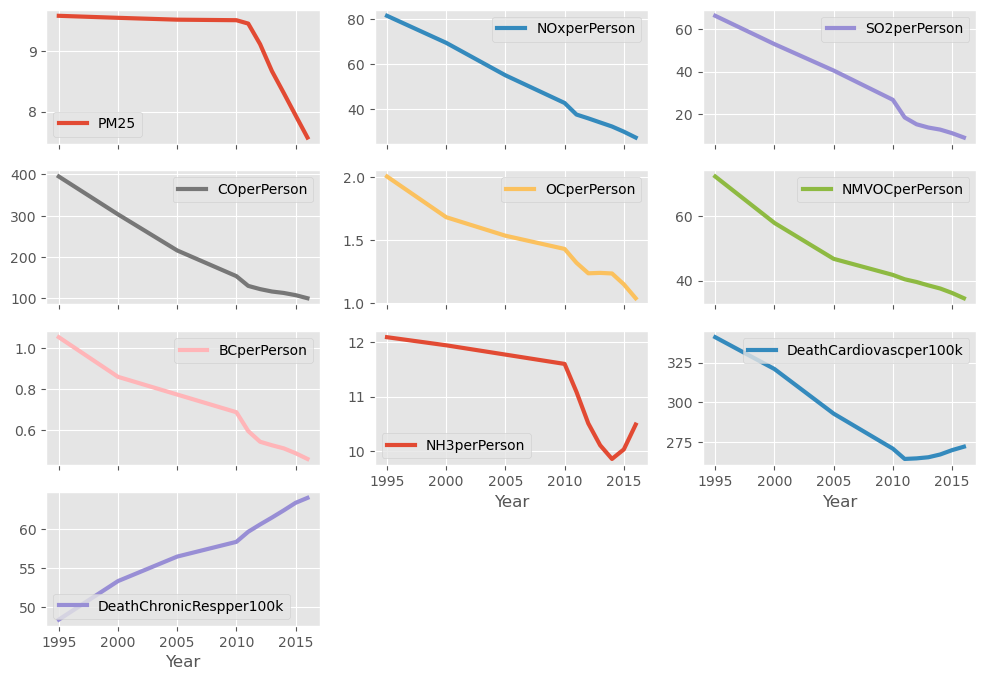

In [10]:
# The null hypothesis of the Augmented Dickey Fuller test is that the dataseries is not static.  
# The null hypothesis is rejected if the p-value is less than 0.05.
#  Therefore PM2.5, BC (black carbon), NH3, and cardiovascular meet the null hypothesis and are not static 
# and must be detrended before analysis.
# However, all other parameters meet stationarity, but best course of action is to remove the trend. 
# After removing trend can look at correlations between trends and on parameters after detrending

# look at trends for all but population for USA

# dataframe with pop and country removed
USA4 = USA.drop(['Country', 'Population'], axis = 1)

# set year as index
USA4 = USA4.set_index('Year')

trend_dict2 = {}

for column in USA4:
    decomposition2 = sm.tsa.seasonal_decompose(USA4[column].dropna(), period=2)
    # Store back the results
    trend_dict2[column] = decomposition2.trend

pd.DataFrame(trend_dict2).plot(subplots=True, layout=(4, 3), linewidth=3);

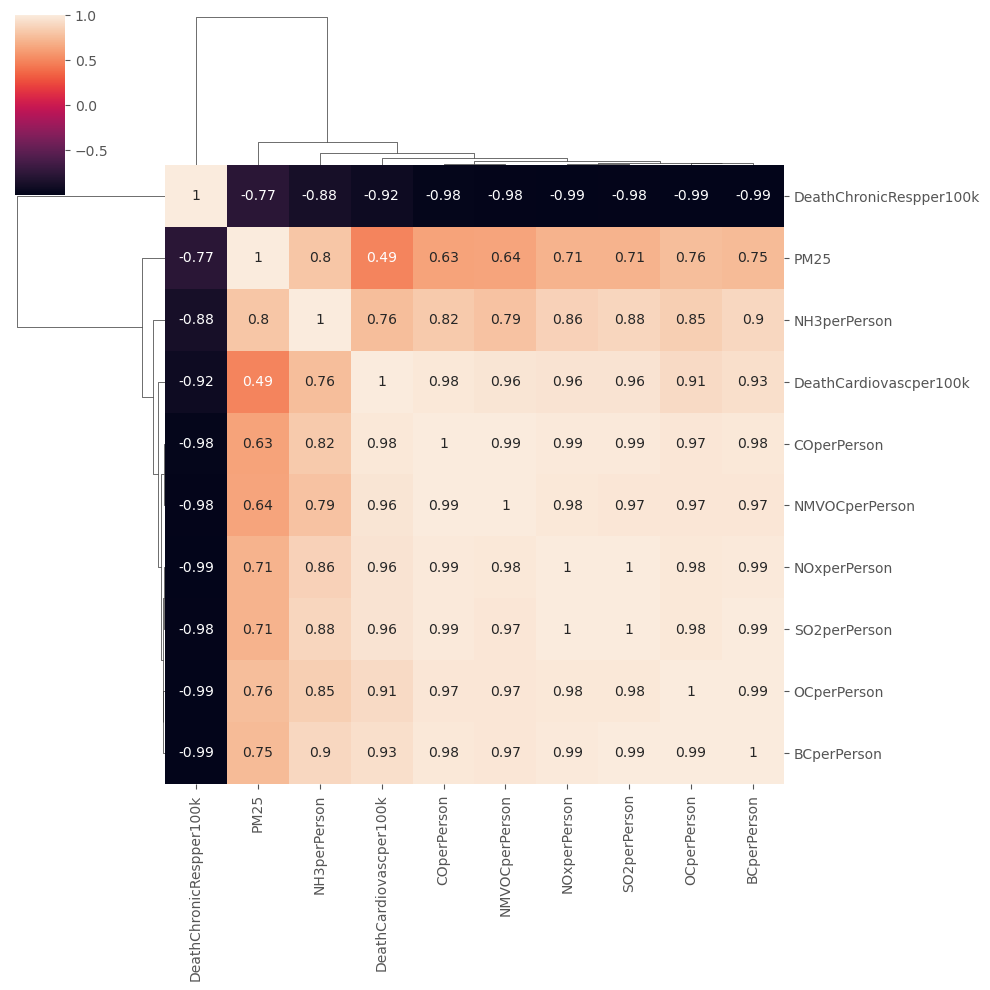

In [11]:
# run a correlation on the trend data using a cluster map to see closely correlated groups, if any

# compute correlation matrix
trend_corr = pd.DataFrame(trend_dict2).corr()

# plot the correlation values as a cluster map

sns.clustermap(trend_corr, annot=True)
plt.show();

# for the USA cardiac death trend correlates strongly with almost all air pollutants (surprisingly PM2.5 was weakest)
# conversely, chronic respiratory burden death trend was negatively correlated with all pollutants 

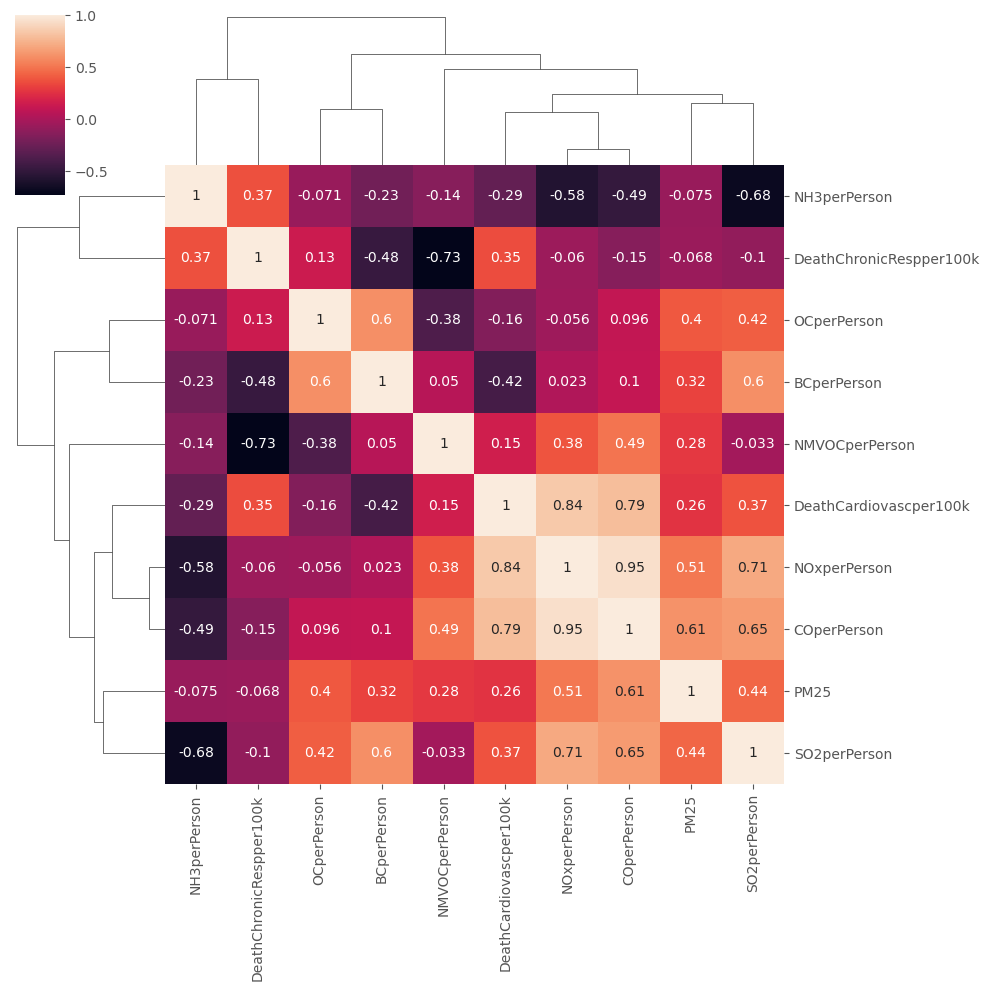

In [12]:
# now remove trend and look at correlation between pollution variables themselves with deaths (cardiac and resp)


detrended = USA4 - pd.DataFrame(trend_dict2)

# compute correlation matrix
detrend_corr = detrended.corr()

# plot the correlation values as a cluster map

sns.clustermap(detrend_corr, annot=True)
plt.show();

# for the USA, cardiovascular deaths correlate strongest with nitric oxide (NOx) and carbon monoxide (CO) air pollution
# whereas chronic respiratory deaths are only positively correlated with ammonia (NH3) air pollution

In [13]:
# Now that we have an idea what the data can look like, analyze all countries

# set columns to run trend decomposition on
columnsc = [ 'PM25', 'BCperPerson', 'NH3perPerson', 'NOxperPerson', 'SO2perPerson', 'COperPerson', 'OCperPerson', 'NMVOCperPerson',  'DeathCardiovascper100k', 'DeathChronicRespper100k']

# set year and country as indicies
world = df.set_index(['Year', 'Country'])

# make an empty dictionary to hold the trend data
worldtrend_dict = {}

# run the trend analysis (pull out trend) on each column, as defined above
for column in columnsc:
    decomp_world = sm.tsa.seasonal_decompose(world[column].dropna(), period=2)
        # Store back the results
    worldtrend_dict[column] = decomp_world.trend

In [14]:
# convert the dictionary to a dataframe
worldtrend_df=pd.DataFrame(worldtrend_dict)
worldtrend_df=worldtrend_df.dropna()

worldtrend_df

,,PM25,BCperPerson,NH3perPerson,NOxperPerson,SO2perPerson,COperPerson,OCperPerson,NMVOCperPerson,DeathCardiovascper100k,DeathChronicRespper100k
Year,Country,,,,,,,,,,
1995,Afghanistan,65.192070,0.484814,6.503858,16.967911,0.467122,36.750346,1.663943,14.295176,326.674647,44.231943
2000,Afghanistan,64.886780,0.438333,5.966179,7.740476,0.251270,18.985501,1.557360,6.424191,269.825269,37.072482
2005,Afghanistan,64.803354,0.421007,5.464701,7.246892,0.361123,18.984228,1.470976,5.732396,227.812663,30.876138
2010,Afghanistan,65.462397,0.420897,5.208898,12.643903,0.727315,30.970749,1.364891,8.441259,197.617684,25.841464
2011,Afghanistan,66.235052,0.430006,5.142873,17.019646,1.074316,40.967357,1.292605,10.617807,185.758129,23.646925
...,...,...,...,...,...,...,...,...,...,...,...
2012,Zimbabwe,23.145374,2.245369,8.867363,6.440647,5.109420,114.185066,7.739553,21.245115,121.192622,20.396038
2013,Zimbabwe,23.056556,2.228182,8.620389,6.368688,5.019365,114.220355,7.695364,21.252167,119.199872,19.935510
2014,Zimbabwe,22.614174,2.205142,8.186673,6.123580,4.950174,113.515589,7.664680,21.125557,118.116560,19.622748


In [15]:
# look for outliers in the trend data using z-score
# a z-score of 1 means the data is one standard deviation greater than the mean, -2 data is 2 standard deviations less than
# the mean, etc.

worldtrend_zscore = worldtrend_df.apply(zscore)  

worldtrend_zscore

,,PM25,BCperPerson,NH3perPerson,NOxperPerson,SO2perPerson,COperPerson,OCperPerson,NMVOCperPerson,DeathCardiovascper100k,DeathChronicRespper100k
Year,Country,,,,,,,,,,
1995,Afghanistan,2.200672,-0.523076,-0.248357,-0.058776,-0.579932,-0.704898,-0.356721,-0.387194,0.485557,0.715496
2000,Afghanistan,2.182430,-0.571666,-0.326920,-0.591215,-0.587625,-0.982568,-0.416557,-0.626088,0.155886,0.320795
2005,Afghanistan,2.177445,-0.589779,-0.400194,-0.619696,-0.583710,-0.982588,-0.465053,-0.647085,-0.087747,-0.020809
2010,Afghanistan,2.216825,-0.589894,-0.437571,-0.308279,-0.570658,-0.795235,-0.524609,-0.564868,-0.262849,-0.298370
2011,Afghanistan,2.262993,-0.580370,-0.447218,-0.055790,-0.558291,-0.638985,-0.565190,-0.498806,-0.331623,-0.419355
...,...,...,...,...,...,...,...,...,...,...,...
2012,Zimbabwe,-0.311732,1.317375,0.096986,-0.666217,-0.414477,0.505429,3.054118,-0.176254,-0.706041,-0.598577
2013,Zimbabwe,-0.317039,1.299408,0.060900,-0.670370,-0.417687,0.505980,3.029311,-0.176040,-0.717597,-0.623966
2014,Zimbabwe,-0.343473,1.275322,-0.002473,-0.684513,-0.420153,0.494964,3.012084,-0.179883,-0.723879,-0.641208


In [16]:
# take a look at min and max z score values for each column
worldtrend_zscore.agg([min, max])

# looks like a very wide range, with a greater range above the mean rather than below mean

,PM25,BCperPerson,NH3perPerson,NOxperPerson,SO2perPerson,COperPerson,OCperPerson,NMVOCperPerson,DeathCardiovascper100k,DeathChronicRespper100k
min,-1.340507,-1.029891,-1.198670,-1.037854,-0.596580,-1.279317,-1.290856,-0.821071,-1.199626,-1.603227
max,4.269782,13.423126,8.636394,6.042501,11.859691,10.478303,10.335144,9.872756,4.740904,5.764351


In [17]:
# z score of +/- 2 represents ~95% of the data, and +/- 3 about 99.7% of the data. 
# select countries with z score higher that 2 to represent outliers and see which countries they are

worldtrend_zscore[(worldtrend_zscore > 2).any(1)] # any(1) tells to look for a z score in any column

# 2 standard deviations away for any parameter includes more than 56 countries...try z score of 3

,,PM25,BCperPerson,NH3perPerson,NOxperPerson,SO2perPerson,COperPerson,OCperPerson,NMVOCperPerson,DeathCardiovascper100k,DeathChronicRespper100k
Year,Country,,,,,,,,,,
1995,Afghanistan,2.200672,-0.523076,-0.248357,-0.058776,-0.579932,-0.704898,-0.356721,-0.387194,0.485557,0.715496
2000,Afghanistan,2.182430,-0.571666,-0.326920,-0.591215,-0.587625,-0.982568,-0.416557,-0.626088,0.155886,0.320795
2005,Afghanistan,2.177445,-0.589779,-0.400194,-0.619696,-0.583710,-0.982588,-0.465053,-0.647085,-0.087747,-0.020809
2010,Afghanistan,2.216825,-0.589894,-0.437571,-0.308279,-0.570658,-0.795235,-0.524609,-0.564868,-0.262849,-0.298370
2011,Afghanistan,2.262993,-0.580370,-0.447218,-0.055790,-0.558291,-0.638985,-0.565190,-0.498806,-0.331623,-0.419355
...,...,...,...,...,...,...,...,...,...,...,...
2012,Zimbabwe,-0.311732,1.317375,0.096986,-0.666217,-0.414477,0.505429,3.054118,-0.176254,-0.706041,-0.598577
2013,Zimbabwe,-0.317039,1.299408,0.060900,-0.670370,-0.417687,0.505980,3.029311,-0.176040,-0.717597,-0.623966
2014,Zimbabwe,-0.343473,1.275322,-0.002473,-0.684513,-0.420153,0.494964,3.012084,-0.179883,-0.723879,-0.641208


In [18]:
# select countries with z score higher that 3 to represent outliers and see which countries they are

worldtrend_zscore[(worldtrend_zscore > 3).any(1)] # any(1) tells to look for a z score in any column

# still some 30+ countries, try just one paramter

PM25  BCperPerson  NH3perPerson  NOxperPerson  \
Year Country                                                        
1995 Australia -1.065708     0.441894      2.567795      3.627421   
2000 Australia -1.056707     0.297201      2.672434      3.224253   
1995 Bahrain    2.373880    -0.105048     -0.802959      2.658525   
2000 Bahrain    2.318055     0.027382     -0.849254      2.516723   
     Belarus   -0.337906    -0.293726      1.195073      0.047554   
...                  ...          ...           ...           ...   
2012 Zimbabwe  -0.311732     1.317375      0.096986     -0.666217   
2013 Zimbabwe  -0.317039     1.299408      0.060900     -0.670370   
2014 Zimbabwe  -0.343473     1.275322     -0.002473     -0.684513   
2015 Zimbabwe  -0.380166     1.258779     -0.033982     -0.703375   
2016 Zimbabwe  -0.388547     1.255660     -0.031652     -0.727489   

                SO2perPerson  COperPerson  OCperPerson  NMVOCperPerson  \
Year Country                                                             
1995 Australia      2.564154     3.047563    -0.113698        1.307802   
2000 Australia      2.234950     2.189315    -0.218338        0.896054   
1995 Bahrain        0.434590     3.212262    -1.046437        2.984505   
2000 Bahrain        0.597640     3.391670    -1.021319        2.272052   
     Belarus        0.015663    -0.518759    -0.267973       -0.060375   
...                      ...          ...          ...             ...   
2012 Zimbabwe      -0.414477     0.505429     3.054118       -0.176254   
2013 Zimbabwe      -0.417687     0.505980     3.029311       -0.176040   
2014 Zimbabwe      -0.420153     0.494964     3.012084       -0.179883   
2015 Zimbabwe      -0.430747     0.492049     3.019010       -0.181489   
2016 Zimbabwe      -0.448402     0.487198     3.047995       -0.184678   

                DeathCardiovascper100k  DeathChronicRespper100k  
Year Country                                                     
1995 Australia                0.220749                 0.545081  
2000 Australia                0.072609                 0.469247  
1995 Bahrain                 -0.688248                -0.853054  
2000 Bahrain                 -0.784971                -0.899724  
     Belarus                  3.057286                 1.236178  
...                                ...                      ...  
2012 Zimbabwe                -0.706041                -0.598577  
2013 Zimbabwe                -0.717597                -0.623966  
2014 Zimbabwe                -0.723879                -0.641208  
2015 Zimbabwe                -0.726768                -0.651351  
2016 Zimbabwe                -0.729613                -0.660110  

[336 rows x 10 columns]

In [22]:
# look at countries who deviate 2 s.d. from the mean for cardiac deaths
cardiacdeathzscore2 = worldtrend_zscore[(worldtrend_zscore > 2).DeathCardiovascper100k]

# create index list
index1 = cardiacdeathzscore2.index

# determine unique countries by index
index1.unique('Country')

# there are 16 unique countries with cardiac deaths trends 2 s.d. above the mean

Index(['Belarus', 'Bulgaria', 'Czechia', 'Estonia', 'Georgia', 'Germany',
       'Hungary', 'Latvia', 'Lithuania', 'Moldova', 'Montenegro',
       'North Macedonia', 'Romania', 'Russia', 'Serbia', 'Ukraine'],
      dtype='object', name='Country')

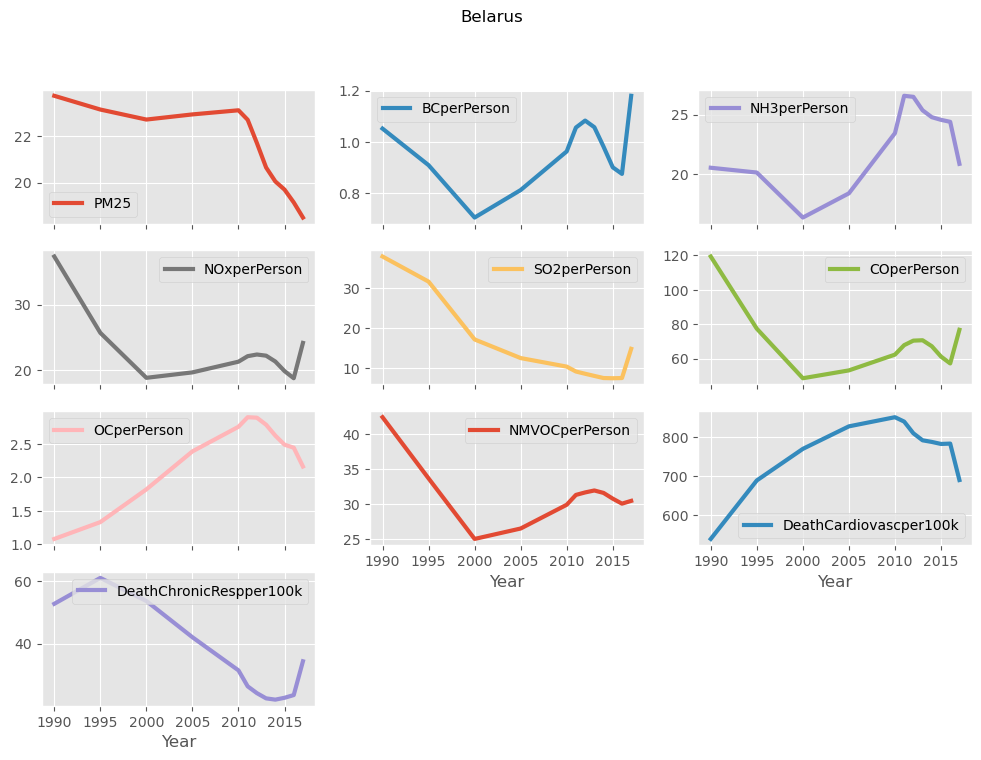

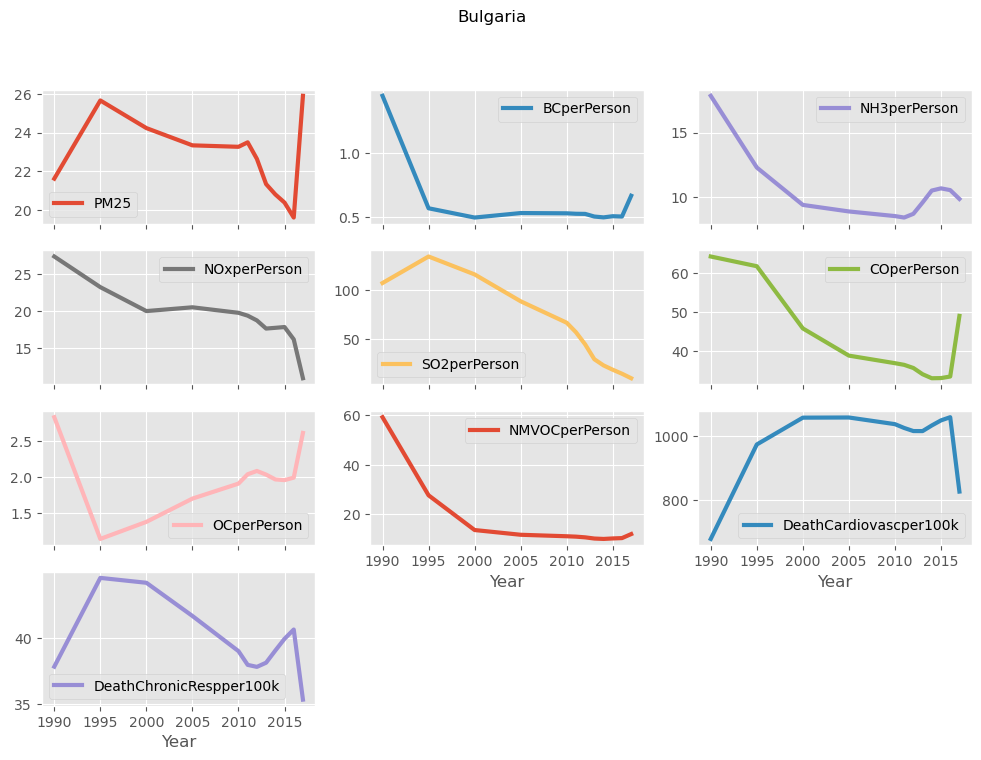

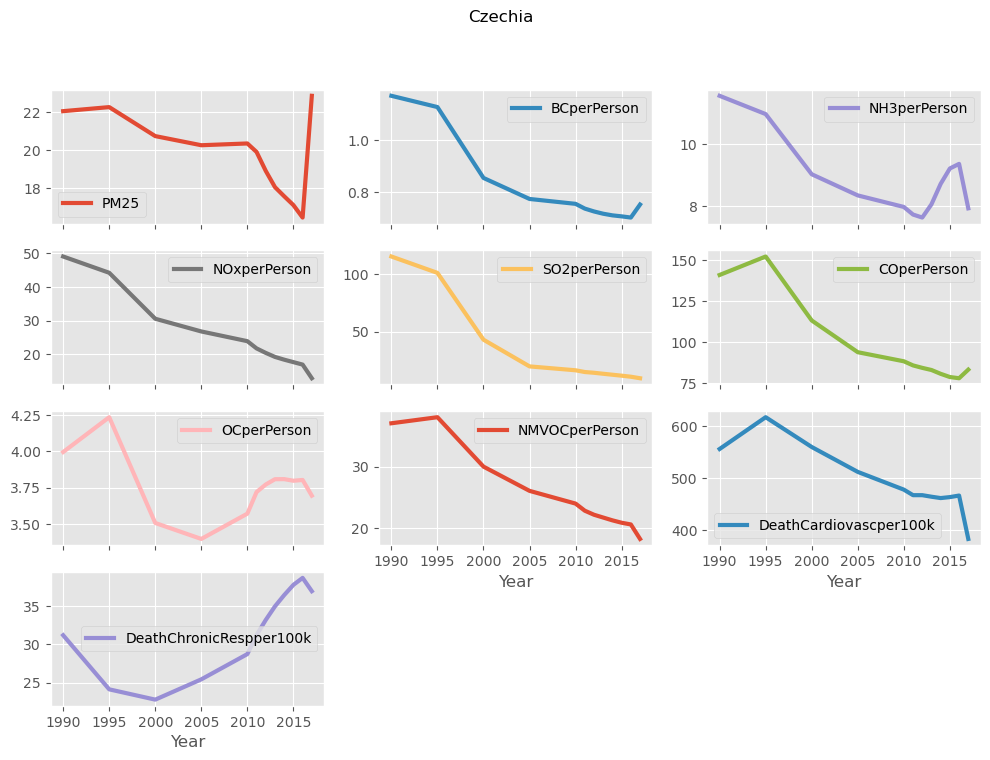

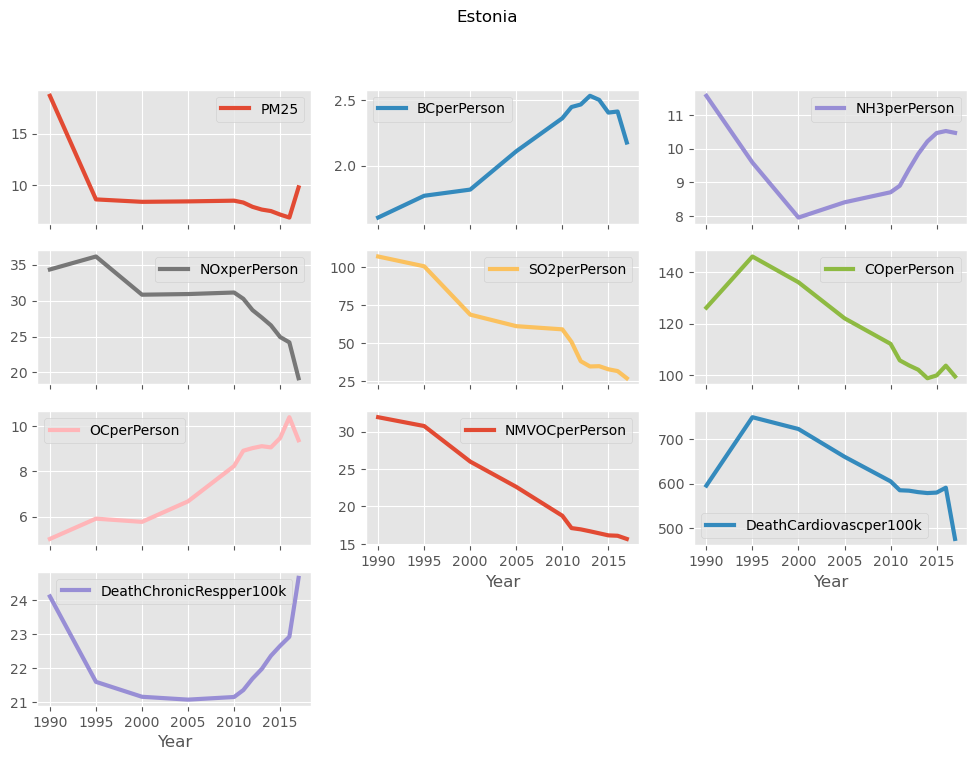

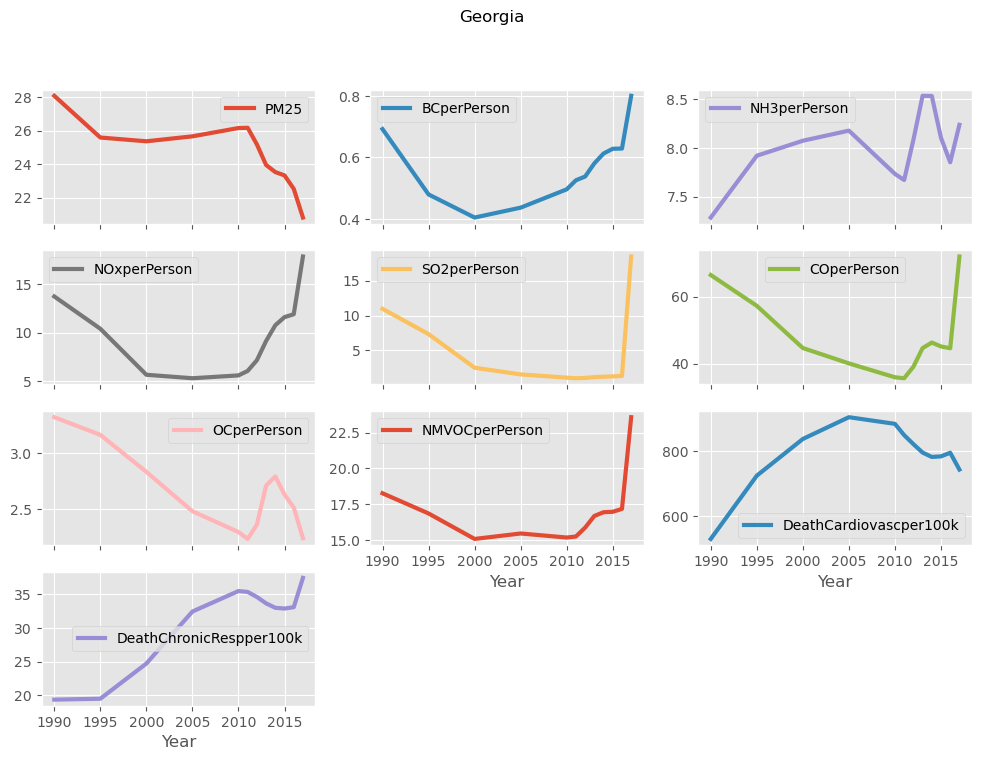

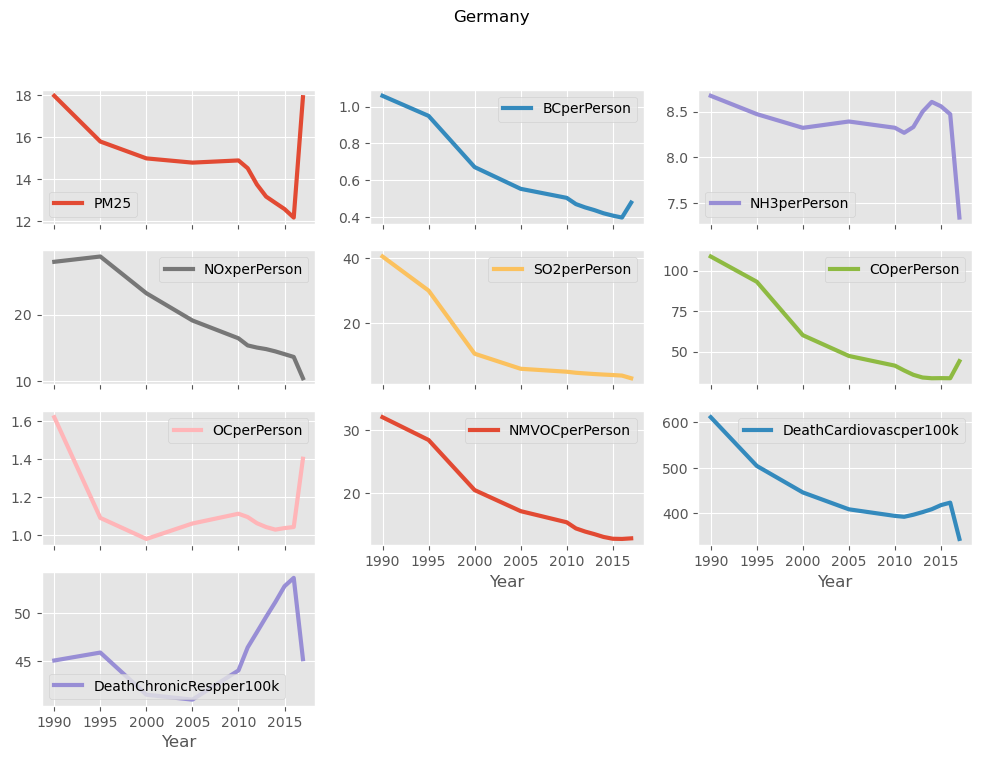

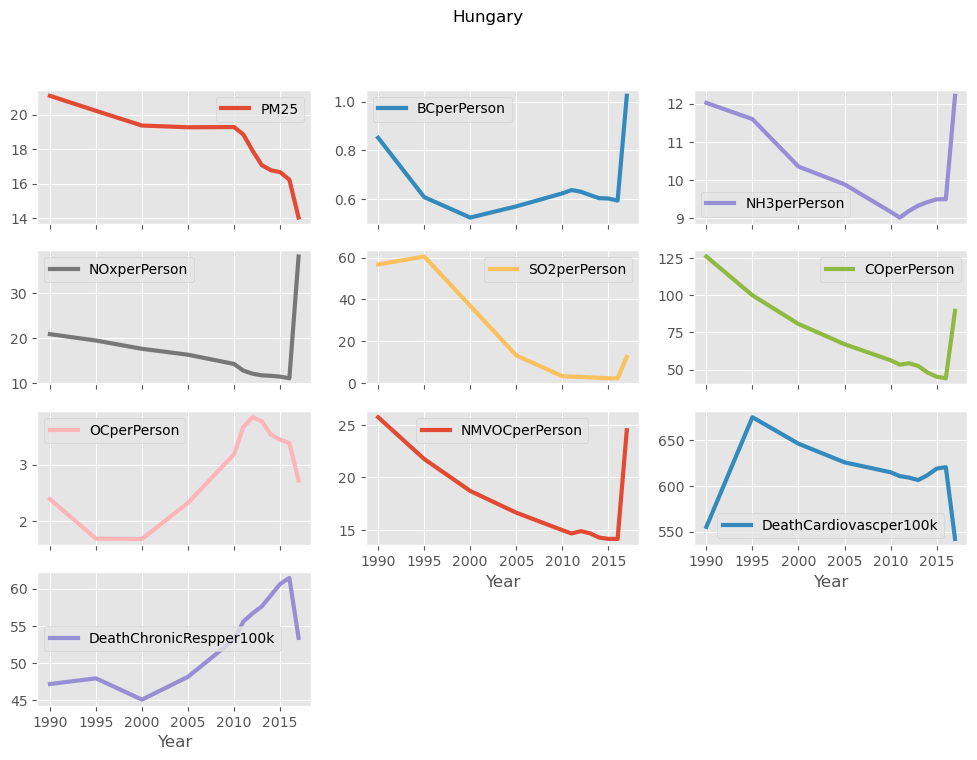

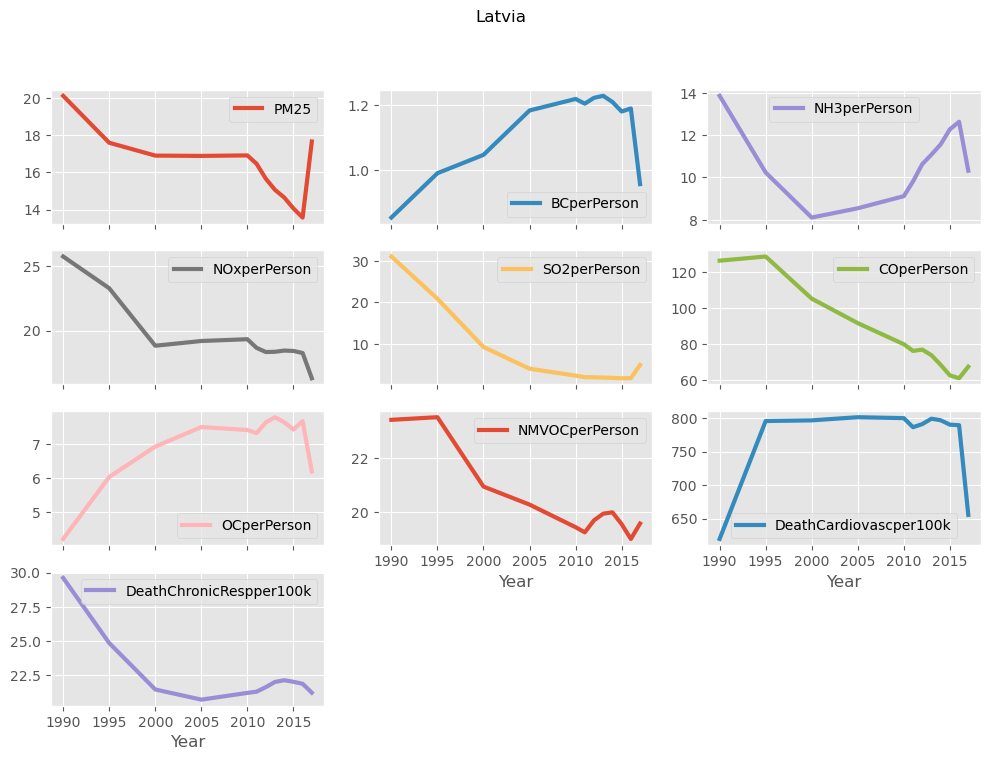

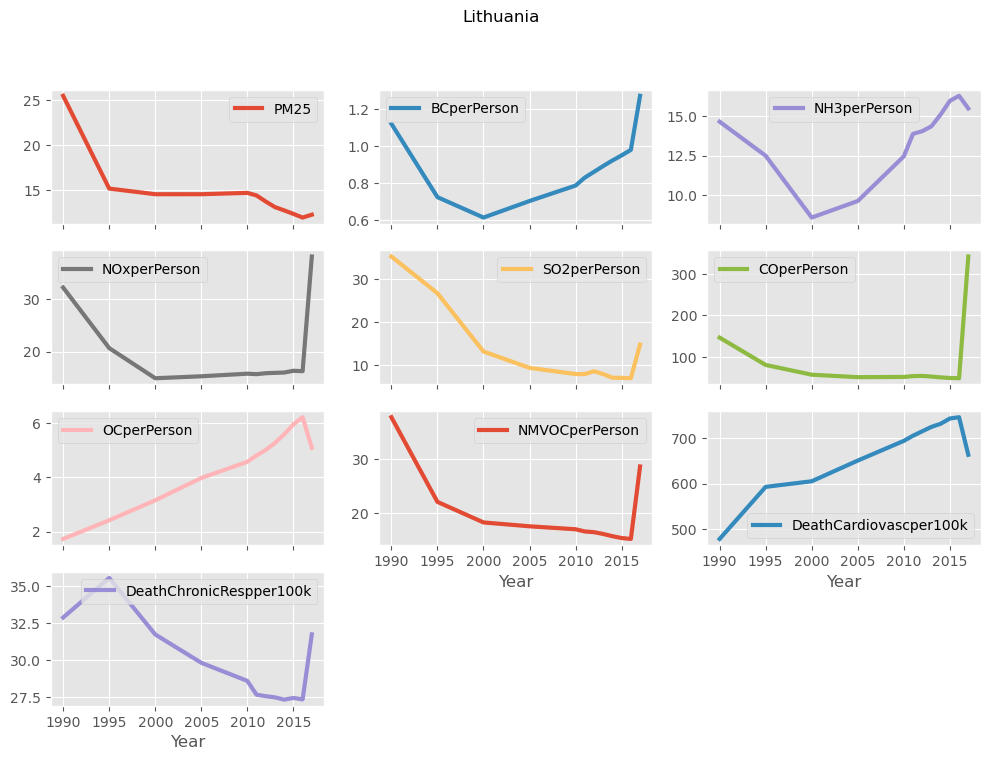

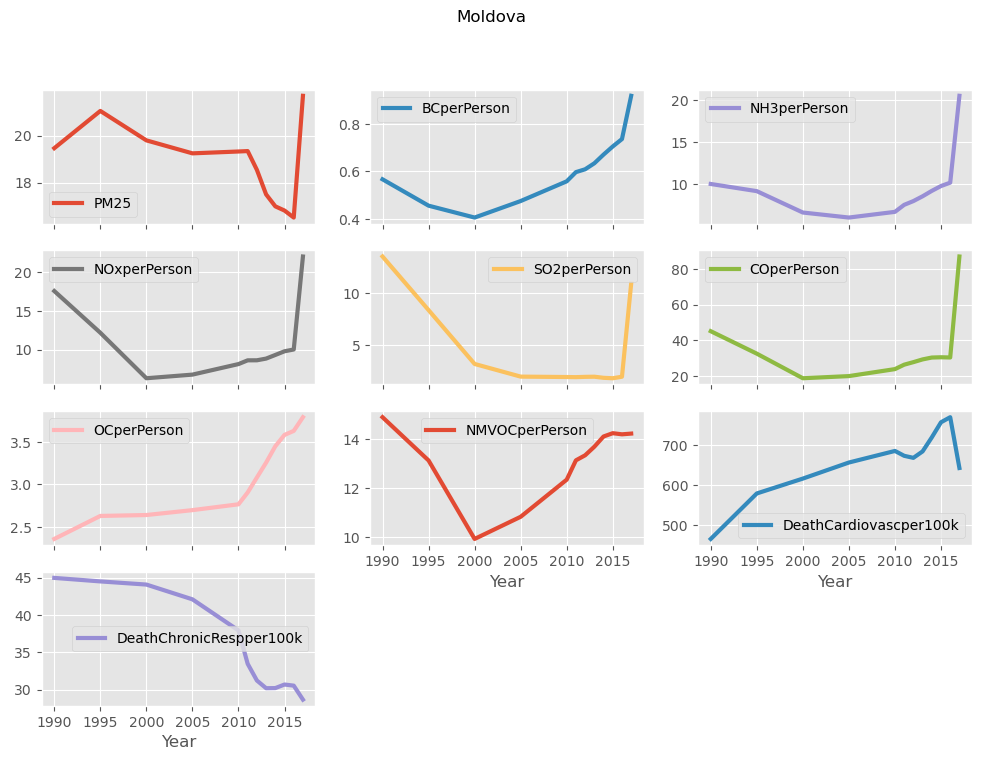

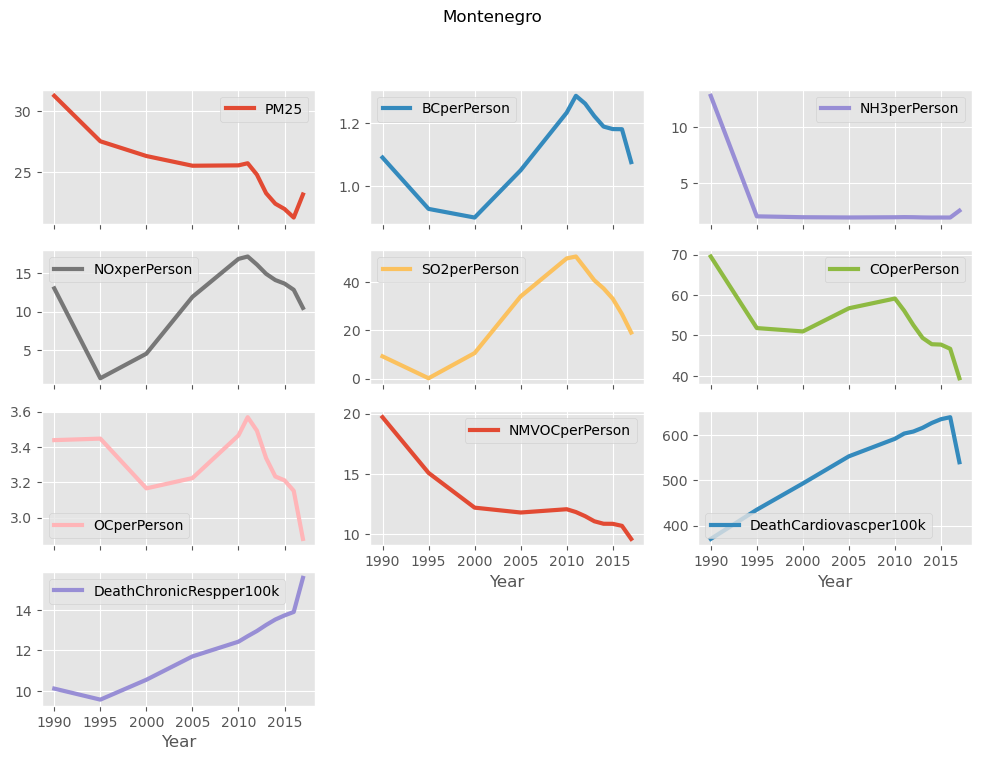

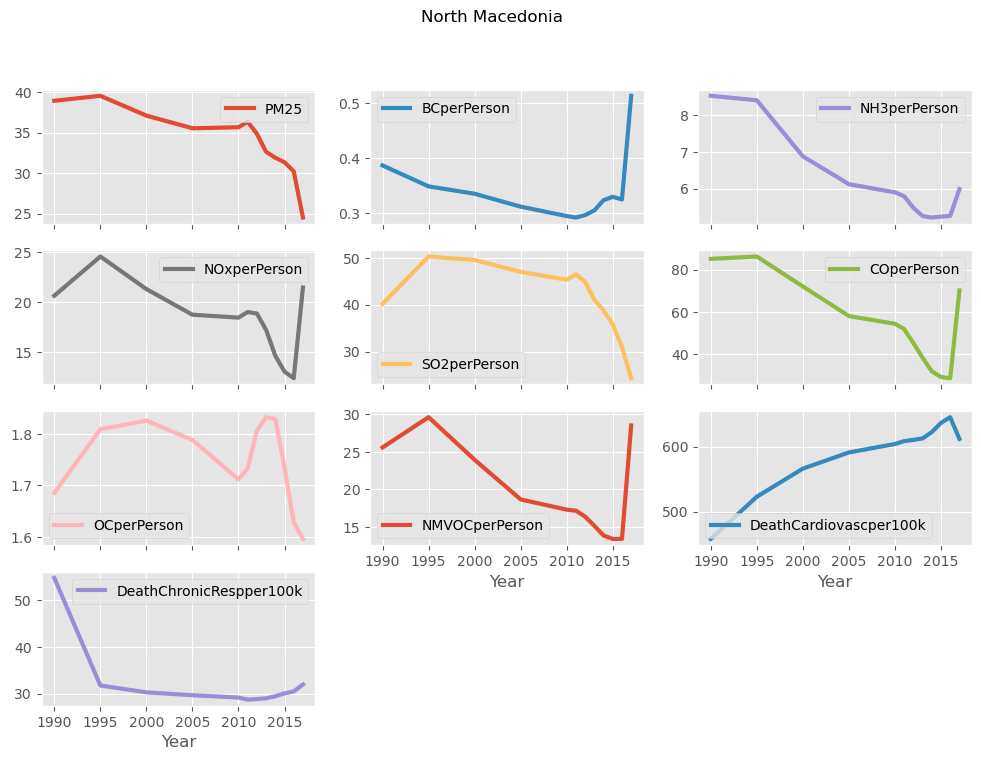

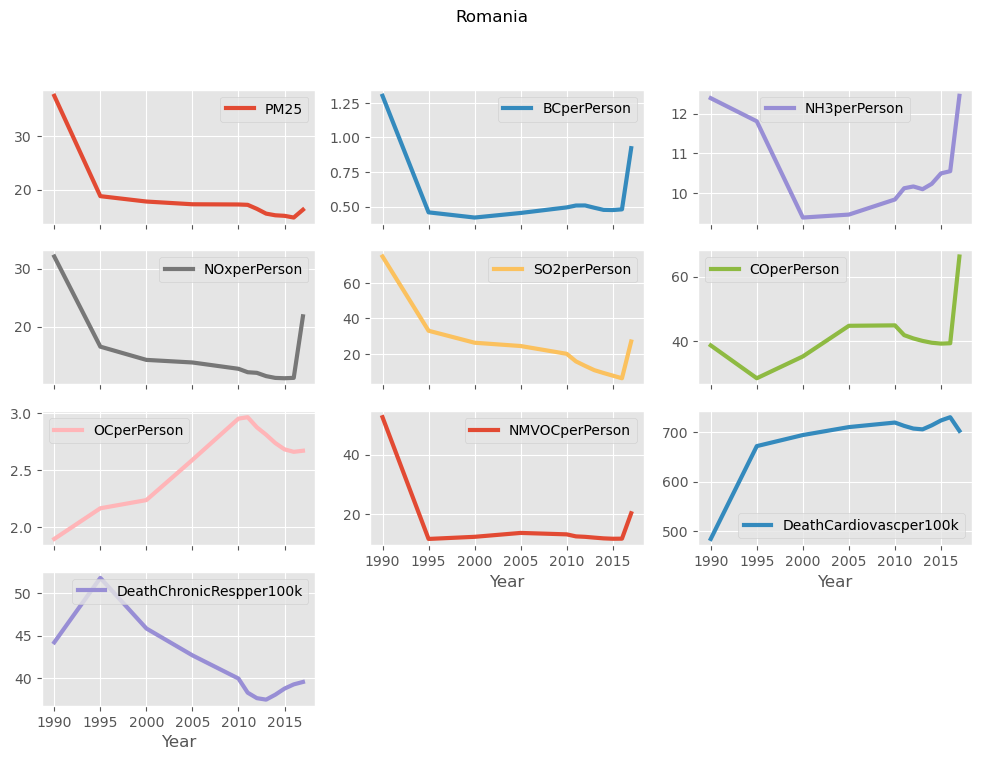

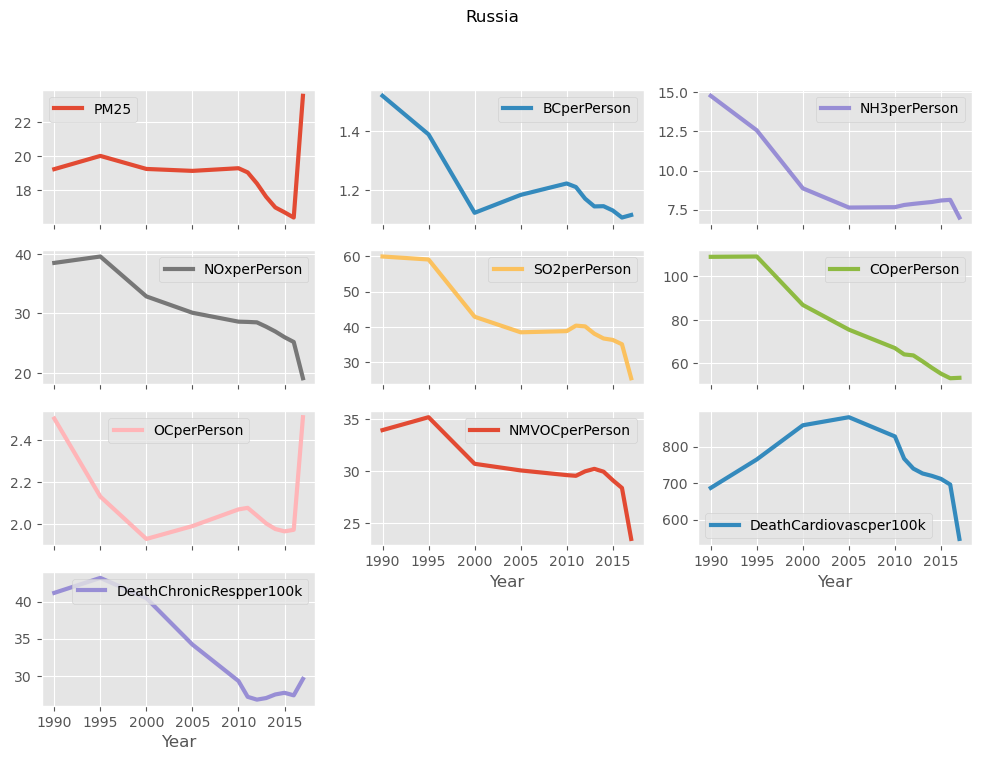

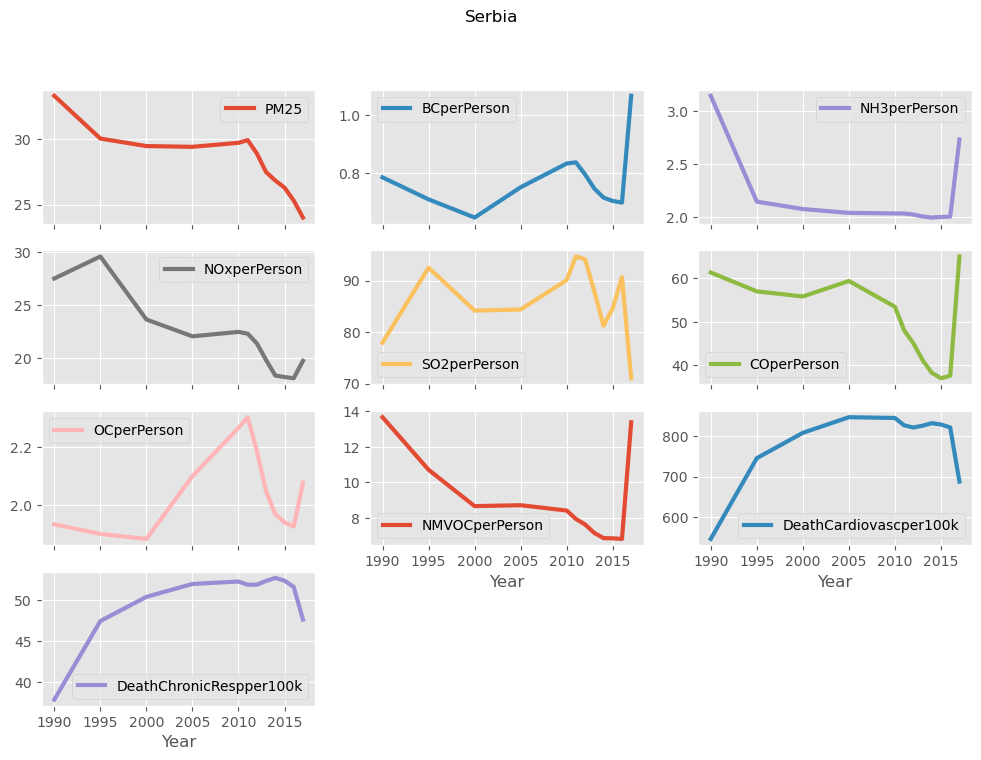

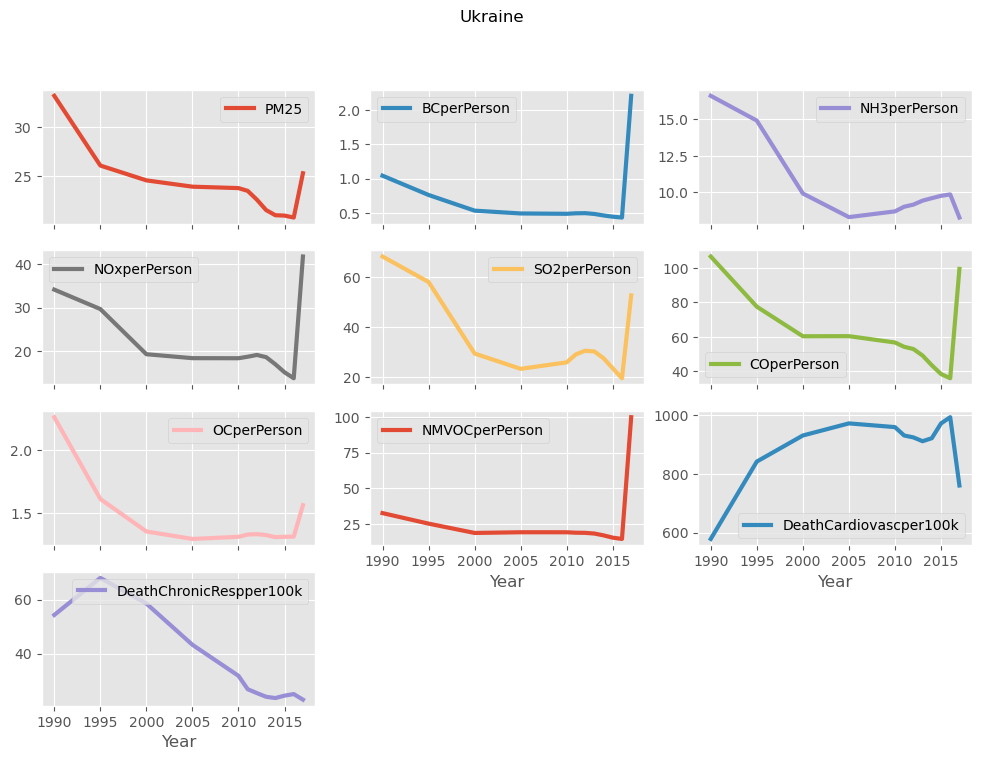

In [20]:
# plot the trends for pollution and deaths for the 16 countries with high cardiac deaths

# convert indices to columns, can't seem to pull out the data with two indices (probably a way, but I couldn't figure it out)

worldtrend_df2 = worldtrend_df.reset_index()

# now set the index to country and the selection will work
worldtrend_df2 = worldtrend_df2.set_index('Country')

# make a list of the countries to run the operation on

cardiac2SDlist = index1.unique('Country').tolist()


# use the list to extract the countries from the world trend data

worldtrend_2sdCardio = worldtrend_df2.loc[cardiac2SDlist]

# set year as indicies for clean looking plots
worldtrend_2sdCardio = worldtrend_2sdCardio.reset_index()

worldtrend_2sdCardio = worldtrend_2sdCardio.set_index('Year')

# now plot the trends, want to label each subplot set with the country, so set up a for loop to group trends by country.
# setting the key equal to each country allows for the title to be generated
for keys, gp in worldtrend_2sdCardio.groupby('Country'):
    gp.plot(subplots=True, layout=(4, 3), linewidth=3) # plot each trend for each country
    plt.suptitle(keys); # apply title for each country

In [21]:
# compute correlation matrix for cardiac deaths versus polution type and respiratory death 
# for all 16 countries that are 2 s.d. above the mean

corr_data_16countryA = worldtrend_2sdCardio.groupby('Country')[worldtrend_2sdCardio.columns[1:]].corr()['DeathCardiovascper100k']

# make dataframe
corr_16country_dfA = pd.DataFrame(corr_data_16countryA)

# plotting every correlation value is not visually easy to read, so make a list of the top correlations

# Organize correlation matrix (unstack)
corr_pairs = corr_16country_dfA.unstack()



# sort by correlation value
sorted_pairs = corr_pairs.sort_values(by='Country')

## NOTE: confidence interval (sl) for correlation is 2 divided by the square root of the number of lags in the correlation
# series.  This dataset has 12 data points (lags) so:
#sl = 2 / sqrt(lags) = ~0.6

## Therefore, we want a correlation value (r) greater than 0.6, so use r = 0.7

# now look at pairs with r > 0.7

high_corr = sorted_pairs[(sorted_pairs) > 0.7]

# exclude correlation with self

high_corr2 = high_corr[(high_corr) < 1]

high_corr2

# for the 16 countries with the most cardiac deaths the trend in cardiovascular deaths correlates
# with organic carbon (OC) most frequently, followed by black carbon (BC) and sulfur dioxide (SO2)

DeathCardiovascper100k                                        \
                                  PM25 BCperPerson NH3perPerson NOxperPerson   
Country                                                                        
Belarus                            NaN         NaN          NaN          NaN   
Bulgaria                           NaN         NaN          NaN          NaN   
Czechia                            NaN    0.794199     0.723028     0.891156   
Estonia                            NaN         NaN          NaN     0.770693   
Georgia                            NaN         NaN          NaN          NaN   
Germany                            NaN    0.888047          NaN     0.863396   
Hungary                            NaN         NaN          NaN          NaN   
Latvia                             NaN    0.808350          NaN          NaN   
Lithuania                          NaN         NaN          NaN          NaN   
Moldova                            NaN         NaN          NaN          NaN   
Montenegro                         NaN         NaN          NaN          NaN   
North Macedonia                    NaN         NaN          NaN          NaN   
Romania                            NaN         NaN          NaN          NaN   
Russia                             NaN         NaN          NaN          NaN   
Serbia                             NaN         NaN          NaN          NaN   
Ukraine                            NaN         NaN          NaN          NaN   

                                                                     \
                SO2perPerson COperPerson OCperPerson NMVOCperPerson   
Country                                                               
Belarus                  NaN         NaN    0.866383            NaN   
Bulgaria                 NaN         NaN         NaN            NaN   
Czechia             0.816208    0.877553         NaN       0.934572   
Estonia                  NaN    0.874779         NaN            NaN   
Georgia                  NaN         NaN         NaN            NaN   
Germany             0.946681    0.891950         NaN       0.915159   
Hungary                  NaN         NaN         NaN            NaN   
Latvia                   NaN         NaN    0.836548            NaN   
Lithuania                NaN         NaN    0.954551            NaN   
Moldova                  NaN         NaN    0.737826            NaN   
Montenegro          0.789258         NaN         NaN            NaN   
North Macedonia          NaN         NaN         NaN            NaN   
Romania                  NaN         NaN    0.766791            NaN   
Russia                   NaN         NaN         NaN            NaN   
Serbia                   NaN         NaN         NaN            NaN   
Ukraine                  NaN         NaN         NaN            NaN   

                                                                
                DeathCardiovascper100k DeathChronicRespper100k  
Country                                                         
Belarus                            NaN                     NaN  
Bulgaria                           NaN                     NaN  
Czechia                            NaN                     NaN  
Estonia                            NaN                     NaN  
Georgia                            NaN                     NaN  
Germany                            NaN                     NaN  
Hungary                            NaN                     NaN  
Latvia                             NaN                     NaN  
Lithuania                          NaN                     NaN  
Moldova                            NaN                     NaN  
Montenegro                         NaN                0.748587  
North Macedonia                    NaN                     NaN  
Romania                            NaN                     NaN  
Russia                             NaN                     NaN  
Serbia                             NaN  

In [23]:
# And just to complete the picture, countries 1 s.d. below the mean are:

# look at countries who deviate 1 s.d. below the mean for cardiac deaths
cardiacdeathzscore3 = worldtrend_zscore[(worldtrend_zscore < -1).DeathCardiovascper100k]

# create index list
index2 = cardiacdeathzscore3.index

# determine unique countries by index
index2.unique('Country')

# there are 10 unique countries with cardiac deaths trends 1 s.d. below the mean

Index(['Bahrain', 'Djibouti', 'Equatorial Guinea', 'Ethiopia', 'Guatemala',
       'Kenya', 'Qatar', 'South Sudan', 'Uganda', 'United Arab Emirates'],
      dtype='object', name='Country')

In [24]:
# Finally, look to see if OC, BC, and SO2 trends correlate strongest with the cardiac death trend for the countries with less cardiac death burden

# make a list of the countries to run the operation on

cardiac1SDlist = index2.unique('Country').tolist()


# use the list to extract the countries from the world trend data

worldtrend_1sdCardio = worldtrend_df2.loc[cardiac1SDlist]

# compute correlation matrix for cardiac deaths versus polution type and respiratory death 
# for all 16 countries that are 2 s.d. above the mean

corr_data_10country = worldtrend_1sdCardio.groupby('Country')[worldtrend_1sdCardio.columns[1:]].corr()['DeathCardiovascper100k']

# make dataframe
corr_data_10country = pd.DataFrame(corr_data_10country)

# plotting every correlation value is not visually easy to read, so make a list of the top correlations

# Organize correlation matrix (unstack)
corr_pairs10country = corr_data_10country.unstack()



# sort by correlation value
sorted_pairs10country = corr_pairs10country.sort_values(by='Country')

## NOTE: confidence interval (sl) for correlation is 2 divided by the square root of the number of lags in the correlation
# series.  This dataset has 12 data points (lags) so:
#sl = 2 / sqrt(lags) = ~0.6

## Therefore, we want a correlation value (r) greater than 0.6, so use r = 0.7

# now look at pairs with r > 0.7

high_corr10 = sorted_pairs10country[(sorted_pairs10country) > 0.7]

# exclude correlation with self

high_corrs10 = high_corr10[(high_corr10) < 1]

high_corrs10

# interestingly, for the 10 countries with the least cardiac deaths the trend in cardiovascular deaths correlates
# most frequently with chronic respiratory deaths, then with ammonia (NH3), and nitic oxides (NOx)
# not organic carbon (OC), black carbon (BC), and sulfur dioxide (SO2) as seen in the countries with most cardiac deaths

DeathCardiovascper100k                           \
                                       PM25 BCperPerson NH3perPerson   
Country                                                                
Bahrain                                 NaN         NaN     0.926275   
Djibouti                                NaN         NaN          NaN   
Equatorial Guinea                       NaN         NaN     0.880461   
Ethiopia                                NaN    0.774137          NaN   
Guatemala                               NaN         NaN          NaN   
Kenya                                   NaN         NaN          NaN   
Qatar                                   NaN         NaN          NaN   
South Sudan                             NaN         NaN          NaN   
Uganda                                  NaN         NaN          NaN   
United Arab Emirates                    NaN         NaN     0.904035   

                                                                        \
                     NOxperPerson SO2perPerson COperPerson OCperPerson   
Country                                                                  
Bahrain                  0.767710          NaN         NaN         NaN   
Djibouti                      NaN          NaN         NaN         NaN   
Equatorial Guinea             NaN          NaN         NaN         NaN   
Ethiopia                      NaN          NaN         NaN         NaN   
Guatemala                     NaN          NaN         NaN         NaN   
Kenya                    0.708537          NaN         NaN         NaN   
Qatar                         NaN          NaN         NaN         NaN   
South Sudan                   NaN          NaN    0.796661         NaN   
Uganda                   0.849136       0.9656         NaN         NaN   
United Arab Emirates          NaN          NaN         NaN         NaN   

                                                            \
                     NMVOCperPerson DeathCardiovascper100k   
Country                                                      
Bahrain                    0.898451                    NaN   
Djibouti                        NaN                    NaN   
Equatorial Guinea               NaN                    NaN   
Ethiopia                        NaN                    NaN   
Guatemala                       NaN                    NaN   
Kenya                           NaN                    NaN   
Qatar                           NaN                    NaN   
South Sudan                     NaN                    NaN   
Uganda                     0.794114                    NaN   
United Arab Emirates            NaN                    NaN   

                                              
                     DeathChronicRespper100k  
Country                                       
Bahrain                                  NaN  
Djibouti                                 NaN  
Equatorial Guinea                   0.996666  
Ethiopia                            0.997599  
Guatemala                           0.891290  
Kenya                               0.978318  
Qatar                               0.949396  
South Sudan                         0.980371  
Uganda                              0.836810  
United Arab Emirates                     NaN